## Importing liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("colwidth",100)
import re
%matplotlib inline
plt.style.use('ggplot')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## importing datasets

In [111]:
train=pd.read_excel("/users/akshay/desktop/machinehack/book price/Data_Train.xlsx") 
test=pd.read_excel("/users/akshay/desktop/machinehack/book price/Data_Test.xlsx") 

In [112]:
# training Data set
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant novel from the Sunday Times Top Ten bestselling auth...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for whom art was not merely a thing of beauty but a vita...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Power to keep them all in awe, they are in that condi...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,"A handful of grain is found in the pocket of a murdered businessman…\n\nRex Fortescue, king of a...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling the world with its unrivalled presentation of the v...",Photography Textbooks,"Arts, Film & Photography",965.62


- **Data types in training dataset**
    - Numerical columns : `Price`, `Ratings`, `Reviews`
    - Categorical columns : `Genre`, `BookCategory`, `Author`,  `Edition`
    - text columns : `Synopsis`,  `Title`
    - location columns : `NIL`
    - Date columns :`Edition`
    - Misc: `NIL`

In [113]:
# testing dataset
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,"A collection of entire body of work of the Sherlock Holmes Series by Arthur Conan Doyle, 'The Co...",Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Everything you need to know about containerizing you...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow using containers Key Features Get up-and-running with ...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria Dawson, growing up isn't a happy experience. Born...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Scientist,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working with Python is an excellent way to start. This hand...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasal Verbs Student Book with Key,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and idioms you need to speak and write naturally in E...",Linguistics (Books),"Language, Linguistics & Writing"


- **Data types in testing dataset**
    - Numerical columns :  `Ratings`, `Reviews`
    - Categorical columns : `Genre`, `BookCategory`, `Author`,  `Edition`
    - text columns : `Synopsis`,  `Title`
    - location columns : `NIL`
    - Date columns :`Edition`
    - Misc : `NIL`
- **Data imputation**
    - Edition --> [publisher, publishdate,year,month]
- **Data preprocessing**
    - Reviews --> extract no. of reviews from  reviews column
    - Ratings --> extract rating from the Ratings column

In [114]:
# shape of the dataset
print("Shape of the train dataset is {} rows and {} columns" .format(len(train),len(train.columns)))
print("Shape of the test dataset is {} rows and {} columns" .format(len(test),len(test.columns)))

Shape of the train dataset is 6237 rows and 9 columns
Shape of the test dataset is 1560 rows and 8 columns


In [115]:
# checking for null values in the dataset
null=pd.DataFrame(train.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(train.isna().sum()/len(train)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Title,0,0
Author,0,0
Edition,0,0
Reviews,0,0
Ratings,0,0
Synopsis,0,0
Genre,0,0
BookCategory,0,0
Price,0,0


In [116]:
# checking for null values in the dataset
null=pd.DataFrame(test.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(test.isna().sum()/len(test)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Title,0,0
Author,0,0
Edition,0,0
Reviews,0,0
Ratings,0,0
Synopsis,0,0
Genre,0,0
BookCategory,0,0


In [117]:
# data types in the data set
dtypes=pd.DataFrame(train.dtypes,columns=["Data Types (train)"])
dtypes["Data Types (test)"]=test.dtypes
dtypes

,Data Types (train),Data Types (test)
Title,object,object
Author,object,object
Edition,object,object
Reviews,object,object
Ratings,object,object
Synopsis,object,object
Genre,object,object
BookCategory,object,object
Price,float64,NaN


In [118]:
describe=train.describe(include =['float', 'int'])
describe.style.background_gradient(cmap='viridis_r',low=0.2,high=0.1)

,Price
count,6237
mean,560.708
std,690.111
min,25
25%,249.18
50%,373
75%,599
max,14100


In [119]:
train.describe(include=["O"])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,6237,6237,6237,6237,6237,6237,6237,6237
unique,5568,3679,3370,36,342,5549,345,11
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests in one volume. These include the best stories of Ti...,Action & Adventure (Books),Action & Adventure
freq,4,69,48,1375,1040,8,947,818


In [120]:
# determining the unique values in the dataset
for unique_val in train.columns:
    unique=train[unique_val].unique()
    print("-"*100)
    print("UNIQUE VALUES IN :",unique_val)
    print("COUNT OF UNIQUE VALUES IN '",unique_val,"':",train[unique_val].nunique())
    print("-"*100)
    print(unique)

----------------------------------------------------------------------------------------------------
UNIQUE VALUES IN : Title
COUNT OF UNIQUE VALUES IN ' Title ': 5568
----------------------------------------------------------------------------------------------------
["The Prisoner's Gold (The Hunters 3)"
 'Guru Dutt: A Tragedy in Three Acts' 'Leviathan (Penguin Classics)' ...
 'The Duke And I: Number 1 in series (Bridgerton Family)'
 'Frostfire (Kanin Chronicles)' 'The First Order (Sam Capra)']
----------------------------------------------------------------------------------------------------
UNIQUE VALUES IN : Author
COUNT OF UNIQUE VALUES IN ' Author ': 3679
----------------------------------------------------------------------------------------------------
['Chris Kuzneski' 'Arun Khopkar' 'Thomas Hobbes' ... 'Saba Naqvi'
 'Tom Phillips' 'Stephenie Meyer']
----------------------------------------------------------------------------------------------------
UNIQUE VALUES IN : Editio

In [121]:
# determining the unique values in the dataset
for unique_val in test.columns:
    unique=test[unique_val].unique()
    print("-"*100)
    print("UNIQUE VALUES IN :",unique_val)
    print("COUNT OF UNIQUE VALUES IN '",unique_val,"':",test[unique_val].nunique())
    print("-"*100)
    print(unique)

----------------------------------------------------------------------------------------------------
UNIQUE VALUES IN : Title
COUNT OF UNIQUE VALUES IN ' Title ': 1521
----------------------------------------------------------------------------------------------------
['The Complete Sherlock Holmes: 2 Boxes sets'
 'Learn Docker - Fundamentals of Docker 18.x: Everything you need to know about containerizing your applications and running them in production'
 'Big Girl' ... 'The Kite Runner Graphic Novel'
 'Panzer Leader (Penguin World War II Collection)'
 'Complete Spanish Step-by-Step']
----------------------------------------------------------------------------------------------------
UNIQUE VALUES IN : Author
COUNT OF UNIQUE VALUES IN ' Author ': 1224
----------------------------------------------------------------------------------------------------
['Sir Arthur Conan Doyle' 'Gabriel N. Schenker' 'Danielle Steel' ...
 'ARUN SAGAR' 'Khaled Hosseini' 'Heinz Guderian']
-----------------

In [122]:
unique=pd.DataFrame(train.nunique(),columns=["Unique Values (train)"])
unique["Unique Values (test)"]=test.nunique()
unique

,Unique Values (train),Unique Values (test)
Title,5568,1521.0
Author,3679,1224.0
Edition,3370,1259.0
Reviews,36,30.0
Ratings,342,163.0
Synopsis,5549,1519.0
Genre,345,225.0
BookCategory,11,11.0
Price,1614,NaN


# Data preprocessing

In [123]:
# changing the name of the incorrrectly named columns (train dataset)
train.rename(columns={"Reviews":"Ratings","Ratings":"Reviews"},inplace=True)
# changing the name of the incorrrectly named columns (test dataset)
test.rename(columns={"Reviews":"Ratings","Ratings":"Reviews"},inplace=True)

# extracting ratings from ratings columns (train dataset)
train["Ratings"]=train["Ratings"].str.replace("out of 5 stars"," ")
train["Reviews"]=train["Reviews"].str.replace("customer reviews"," ")
train["Reviews"]=train["Reviews"].str.replace("1 customer review","1")
train["Reviews"]=train["Reviews"].str.replace(",","")

# extracting ratings from ratings columns (test dataset)
test["Ratings"]=test["Ratings"].str.replace("out of 5 stars"," ")
test["Reviews"]=test["Reviews"].str.replace("customer reviews"," ")
test["Reviews"]=test["Reviews"].str.replace("1 customer review","1")
test["Reviews"]=test["Reviews"].str.replace(",","")

# converting the data type to float and int (train dataset) 
train["Ratings"]=train["Ratings"].astype(float)
train["Reviews"]=train["Reviews"].astype(int)
# converting the data type to float and int (test dataset) 
test["Ratings"]=test["Ratings"].astype(float)
test["Reviews"]=test["Reviews"].astype(int)


# creating new column "Publication"
#for train dataset
b=[]
for i in train["Edition"].str.split(","):
    a=i[0]
    b.append(a)
train["Publication"]=b
#for test dataset
b=[]
for i in test["Edition"].str.split(","):
    a=i[0]
    b.append(a)
test["Publication"]=b

## creating new column "Publication Year"
#for train dataset
b=[]
for i in train["Edition"].str.split(" "):
    a=i[-1]
    b.append(a)
train["Publication_Year"]=b
#for test dataset
b=[]
for i in test["Edition"].str.split(" "):
    a=i[-1]
    b.append(a)
test["Publication_year"]=b

In [124]:
train.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Publication,Publication_Year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant novel from the Sunday Times Top Ten bestselling auth...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for whom art was not merely a thing of beauty but a vita...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Power to keep them all in awe, they are in that condi...",International Relations,Humour,299.00,Paperback,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,"A handful of grain is found in the pocket of a murdered businessman…\n\nRex Fortescue, king of a...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling the world with its unrivalled presentation of the v...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006


In [125]:
test.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Publication,Publication_year
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4,960,"A collection of entire body of work of the Sherlock Holmes Series by Arthur Conan Doyle, 'The Co...",Short Stories (Books),"Crime, Thriller & Mystery",Mass Market Paperback,1986
1,Learn Docker - Fundamentals of Docker 18.x: Everything you need to know about containerizing you...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0,1,Enhance your software deployment workflow using containers Key Features Get up-and-running with ...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,2018
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0,4,"'Watch out, world. Here I come!'\nFor Victoria Dawson, growing up isn't a happy experience. Born...",Romance (Books),Romance,Paperback,2011
3,Think Python: How to Think Like a Computer Scientist,Allen B. Downey,"Paperback,– 2016",4.1,11,"If you want to learn how to program, working with Python is an excellent way to start. This hand...",Programming & Software Development (Books),"Computing, Internet & Digital Media",Paperback,2016
4,Oxford Word Skills: Advanced - Idioms & Phrasal Verbs Student Book with Key,Redman Gairns,"Paperback,– 26 Dec 2011",4.4,9,"Learn and practise the verbs, prepositions and idioms you need to speak and write naturally in E...",Linguistics (Books),"Language, Linguistics & Writing",Paperback,2011


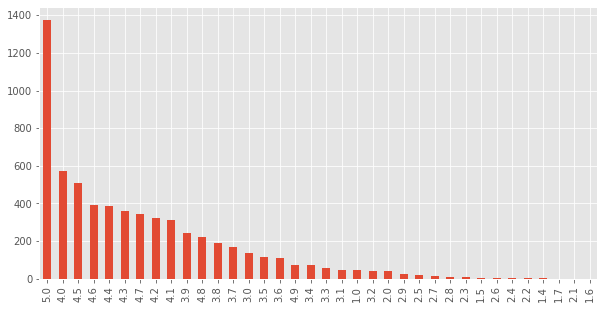

In [126]:
plt.figure(figsize=(10,5))
train["Ratings"].value_counts().plot.bar()

In [127]:
X=train.copy()
X["Genre"]=X["Genre"].astype("category")
X["Genre"]=X["Genre"].cat.codes
X["BookCategory"]=X["BookCategory"].astype("category")
X["BookCategory"]=X["BookCategory"].cat.codes
X["Author"]=X["Author"].astype("category")
X["Author"]=X["Author"].cat.codes
X["Edition"]=X["Edition"].astype("category")
X["Edition"]=X["Edition"].cat.codes
cols=X[["Ratings","Reviews","Price","Genre","BookCategory","Edition","Author"]]
corr=pd.DataFrame(cols.corr()["Price"])
corr

,Price
Ratings,0.108373
Reviews,-0.078063
Price,1.000000
Genre,0.061064
BookCategory,-0.011616
Edition,-0.112063
Author,-0.002670


In [128]:
Test=test.copy()
Test["Genre"]=Test["Genre"].astype("category")
Test["Genre"]=Test["Genre"].cat.codes
Test["BookCategory"]=Test["BookCategory"].astype("category")
Test["BookCategory"]=Test["BookCategory"].cat.codes
Test["Author"]=Test["Author"].astype("category")
Test["Author"]=Test["Author"].cat.codes
Test["Edition"]=Test["Edition"].astype("category")
Test["Edition"]=Test["Edition"].cat.codes
Test=Test[["Ratings","Reviews","Genre","BookCategory","Edition","Author"]]

In [129]:
Test.head()

,Ratings,Reviews,Genre,BookCategory,Edition,Author
0,4.4,960,189,5,227,1071
1,5.0,1,163,4,1166,356
2,5.0,4,185,9,512,239
3,4.1,11,174,4,638,45
4,4.4,9,143,7,745,933


In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [131]:
X=cols.drop("Price",axis=1)
y=cols["Price"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
rf=RandomForestRegressor()
model=rf.fit(X,y)
y_pred=model.predict(Test)
rf.score(X,y)

0.880665468568468

In [29]:
submission=pd.read_excel("/users/akshay/desktop/machinehack/book price/Sample_Submission.xlsx") 

In [30]:
submission=pd.DataFrame(y_pred,columns=["Price"])
submission.head()
submission.to_excel("/users/akshay/desktop/machinehack/book price/submission4.xlsx",index=False)

In [31]:
Test["Price"]=submission

In [32]:
Test.head()

,Ratings,Reviews,Genre,BookCategory,Edition,Author,Price
0,4.4,960,189,5,227,1071,527.3550
1,5.0,1,163,4,1166,356,1055.7317
2,5.0,4,185,9,512,239,778.8919
3,4.1,11,174,4,638,45,810.1797
4,4.4,9,143,7,745,933,264.0556


In [132]:
q1=cols["Price"].quantile(0.25)
q3=cols["Price"].quantile(0.75)
iqr=q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
lower_bound,upper_bound

(-275.55, 1123.73)

In [133]:
X1=cols[cols["Price"].between(275.55, 1123.73,inclusive=True)]
X1.shape

(3786, 7)

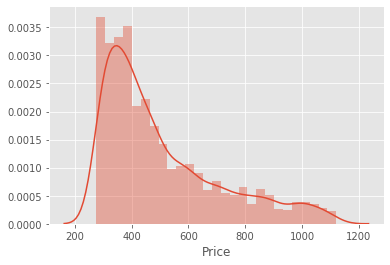

In [134]:
sns.distplot((X1["Price"]))

In [135]:
X=X1.drop("Price",axis=1)
y=X1["Price"]

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
rf=RandomForestRegressor()
model=rf.fit(X,y)
y_pred=model.predict(Test)
rf.score(X,y)

0.8891303627593607

In [139]:
submission=pd.read_excel("/users/akshay/desktop/machinehack/book price/Sample_Submission.xlsx") 

In [141]:
submission=pd.DataFrame(y_pred,columns=["Price"])
submission.head()
submission.to_excel("/users/akshay/desktop/machinehack/book price/submission5.xlsx",index=False)